In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import json

import matplotlib.ticker as mtick


N=10
M=10
res_dir = os.path.join('res', f'{N}_{M}')

ref = [
    'bh', 
    'gurobi',
]

ref_name = f'{ref[0]}'
cmp_name = f'{ref[0]}_{ref[1]}'


In [25]:
def dist(x, y):
    d = np.sum(np.abs(x - y)).astype(np.int32)
    return d


def distance_across(votings_hists, x) -> int:
    return min(dist(x, v) for v in votings_hists)

In [26]:
with open(os.path.join(res_dir, f'{ref_name}.json')) as f:
    json_reference = np.array(json.load(f)["hists"])
    json_dists = [distance_across(json_reference[:i+2, :], x) for i, x in enumerate(json_reference[2:, :])]
    n = len(json_dists)
    data = list(zip(range(3, n+2), json_dists, [1] * n, [0] * n, [ref[0]] * n))
gurobi_bh = pd.read_csv(os.path.join(res_dir, f'{cmp_name}.csv'))

gurobi_bh = pd.concat([gurobi_bh, pd.DataFrame(data, columns=gurobi_bh.columns)], ignore_index=True)


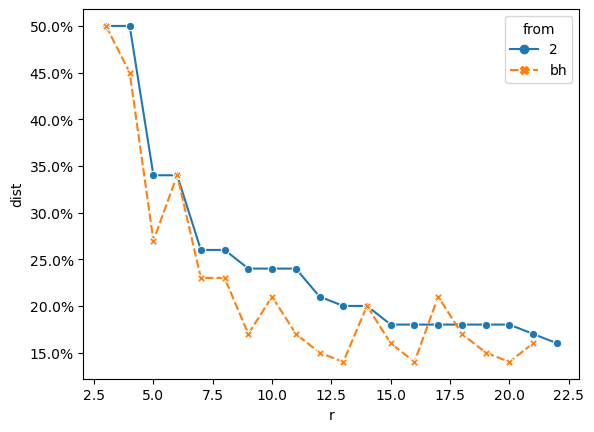

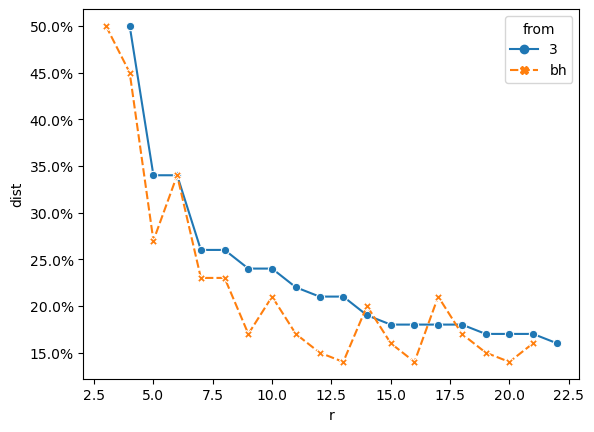

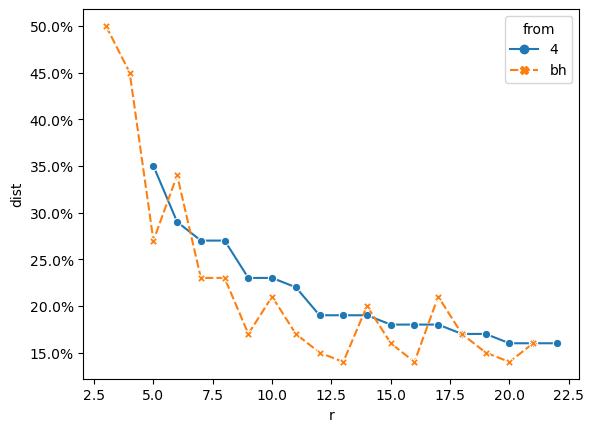

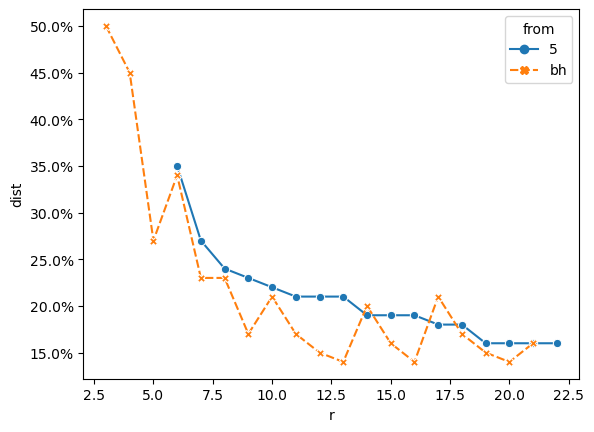

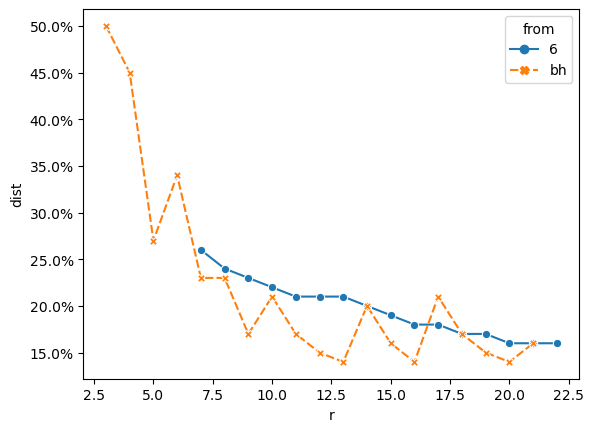

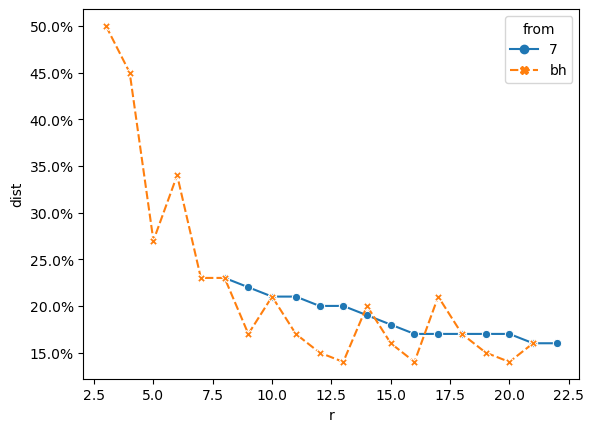

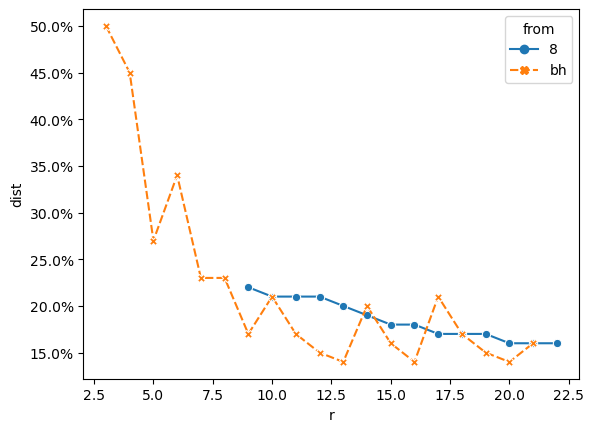

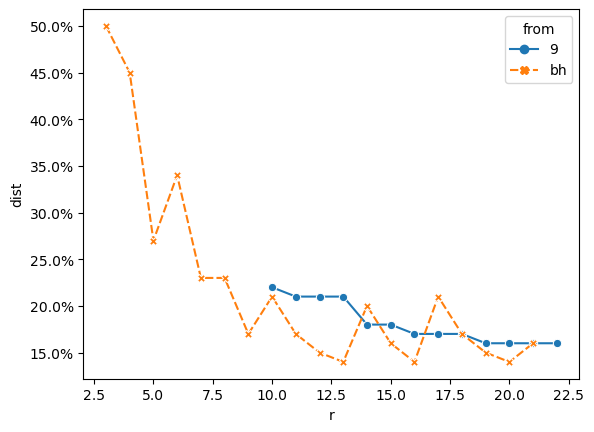

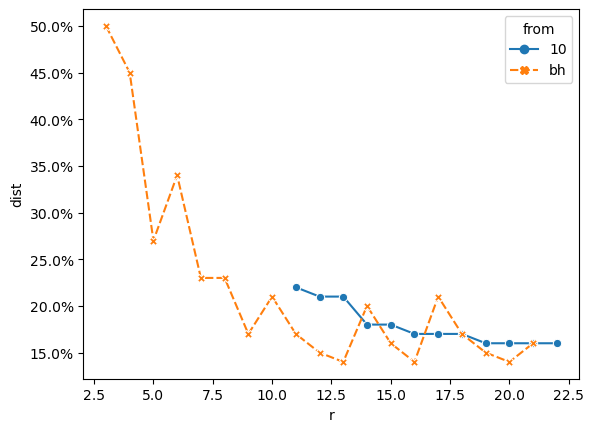

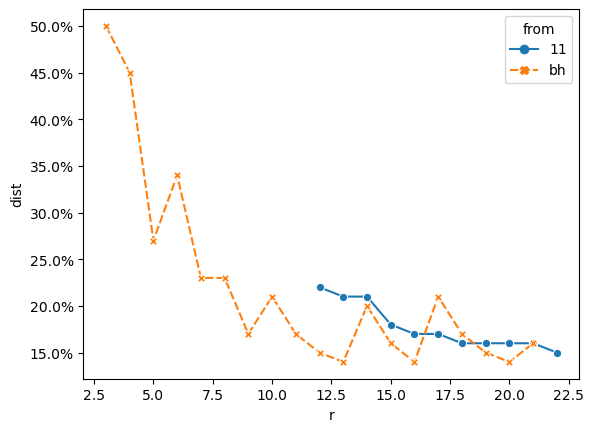

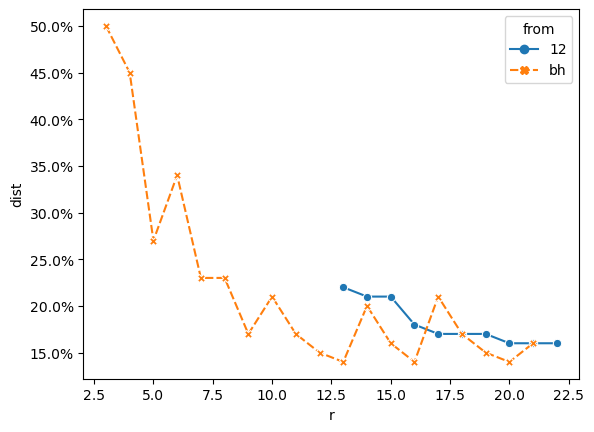

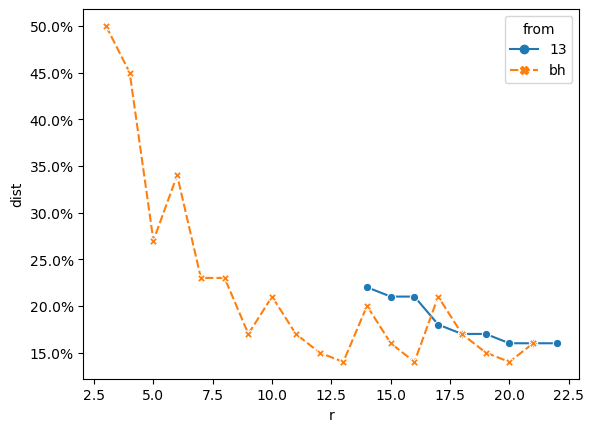

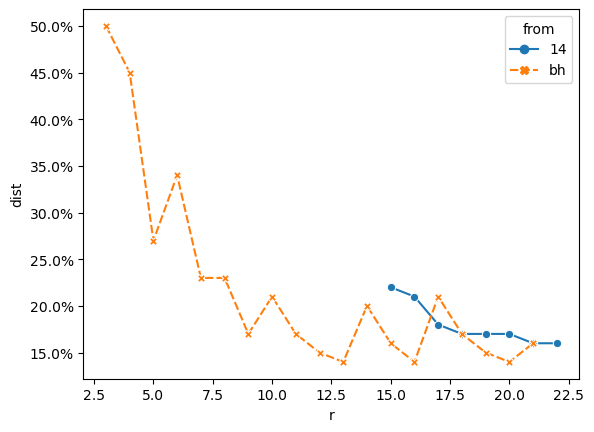

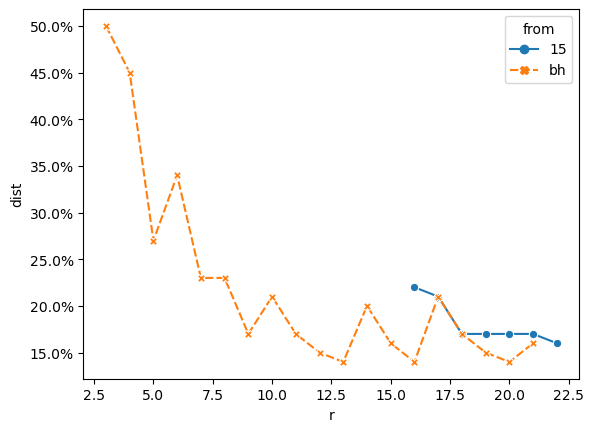

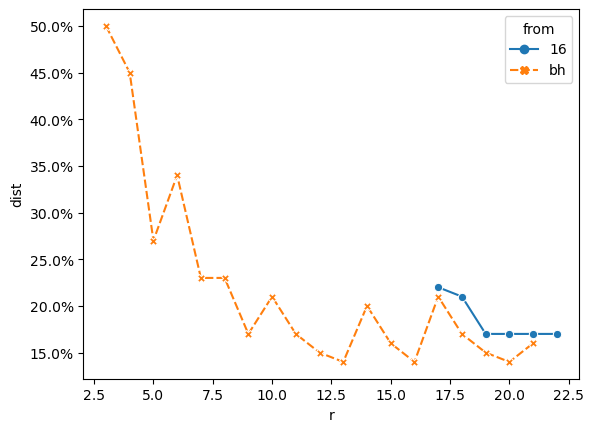

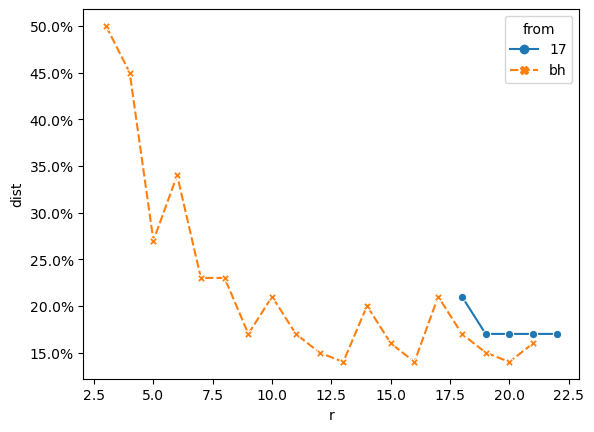

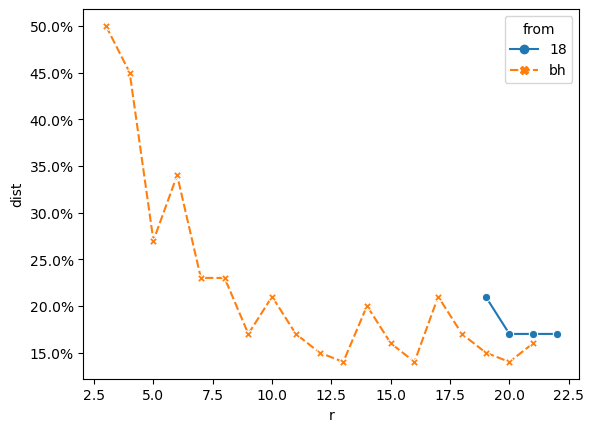

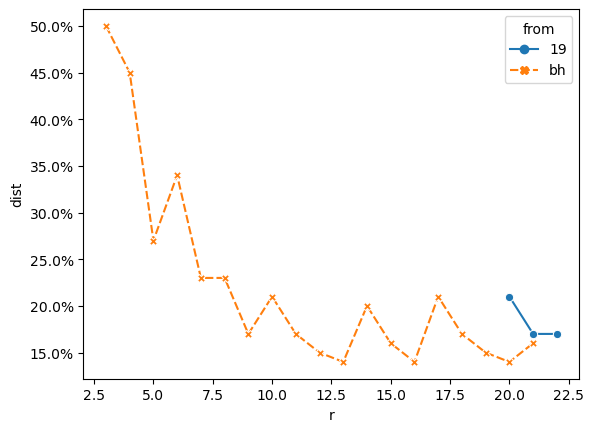

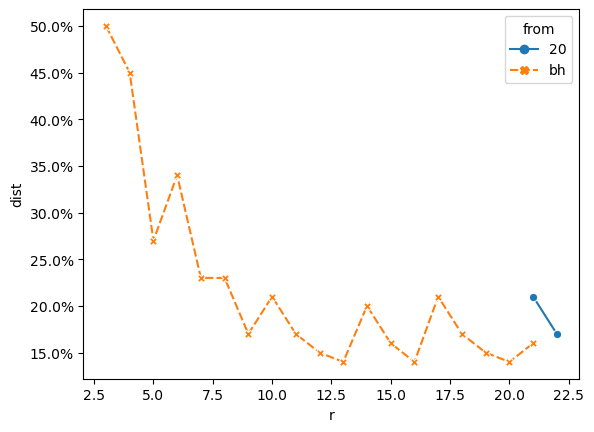

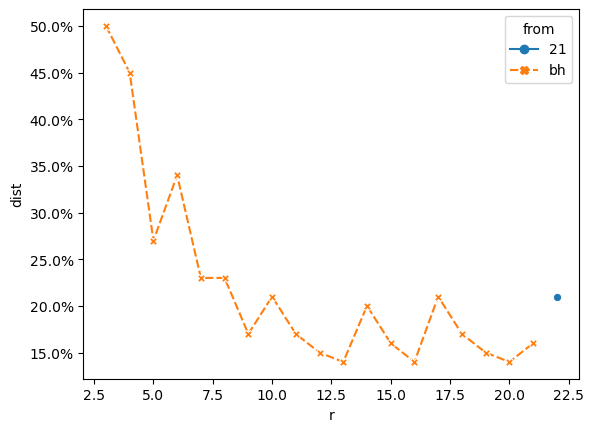

In [27]:
for k in gurobi_bh['from'].unique():
    if k == ref[0]:
        continue
    keys = [ref[0], k]
    df = gurobi_bh[gurobi_bh['from'].isin(keys)]
    sns.lineplot(data=df, x='r', y='dist', hue='from', style='from', markers=True)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()


In [29]:
result = []
for r_from in gurobi_bh['from'].unique():
    if r_from == ref[0]:
        continue
    estimated = gurobi_bh.loc[gurobi_bh['from'] == r_from, 'dist'].to_numpy()
    estimated = np.sort(estimated) / np.sort(json_dists[r_from-2:])
    result.append(np.mean(estimated))

Text(0, 0.5, 'bh/gurobi')

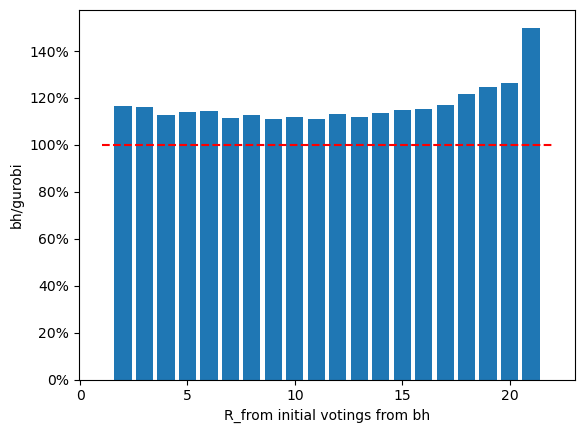

In [30]:
x = list(range(2, len(result) + 2))
fig, ax = plt.subplots(1, 1)


ax.bar(x, height=np.array(result))

ax.plot([x[0]-1, x[-1]+1], [1, 1], color='red', linestyle='--')
xticks = mtick.PercentFormatter(1.0)
ax.yaxis.set_major_formatter(xticks)
ax.set_xlabel(f'R_from initial votings from {ref_name}')
ax.set_ylabel(cmp_name.replace('_', '/'))

In [ ]:
ref_times = []
for r_from in gurobi_bh['from'].unique():
    if r_from == ref[0]:
        continue
    estimated = gurobi_bh.loc[gurobi_bh['from'] == r_from, 'dist'].to_numpy()
    estimated = np.sort(estimated) / np.sort(json_dists[r_from-2:])
    ref_times.append(np.mean(estimated))